## Q1

In [25]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.special import expit

# Load Breast Cancer dataset
url_bc = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns_bc = ["ID", "diagnosis"] + [f"feature_{i}" for i in range(1, 31)]
df_bc = pd.read_csv(url_bc, header=None, names=columns_bc)

# Convert diagnosis to binary (M = 1 for malignant, B = 0 for benign)
df_bc["diagnosis"] = df_bc["diagnosis"].map({"M": 1, "B": 0})

# Select features and target
X_bc = df_bc.iloc[:, 2:].values  # Features (mean radius, texture, etc.)
y_bc = df_bc["diagnosis"].values  # Target

# Standardize features
scaler_bc = StandardScaler()
X_bc_scaled = scaler_bc.fit_transform(X_bc)

# Train-test split
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc_scaled, y_bc, test_size=0.2, random_state=42)

# Number of features
p_bc = X_train_bc.shape[1]

# Bayesian Logistic Regression Model
with pm.Model() as logistic_model:
    betas = pm.Normal("betas", mu=0, sigma=1, shape=p_bc)
    intercept = pm.Normal("intercept", mu=0, sigma=1)

    logits = pm.math.dot(X_train_bc, betas) + intercept
    p = pm.math.sigmoid(logits)

    y_obs = pm.Bernoulli("y_obs", p=p, observed=y_train_bc)

    # Perform MCMC sampling
    trace_bc = pm.sample(2000, return_inferencedata=True, target_accept=0.9)

# Summary of posterior distribution
az.summary(trace_bc)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, intercept]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 239 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 8000 divergences after tuning. Increase `target_accept` or reparameterize.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.767,0.862,-0.921,2.267,0.148,0.045,35.0,127.0,1.10
betas[1],0.601,0.516,-0.340,1.593,0.098,0.039,28.0,111.0,1.12
betas[2],0.617,0.926,-1.096,2.362,0.159,0.060,35.0,76.0,1.09
betas[3],0.299,0.812,-1.218,1.628,0.157,0.037,31.0,177.0,1.12
betas[4],0.227,0.610,-0.850,1.311,0.172,0.047,13.0,92.0,1.24
betas[5],-0.474,0.815,-2.024,0.772,0.217,0.087,16.0,37.0,1.20
betas[6],0.379,0.699,-1.058,1.657,0.170,0.059,16.0,121.0,1.19
betas[7],1.502,0.733,0.192,2.946,0.122,0.065,38.0,94.0,1.08
betas[8],-0.244,0.497,-1.089,0.787,0.071,0.026,49.0,168.0,1.05
betas[9],-0.347,0.725,-1.517,1.303,0.238,0.131,10.0,12.0,1.33


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>]], dtype=object)

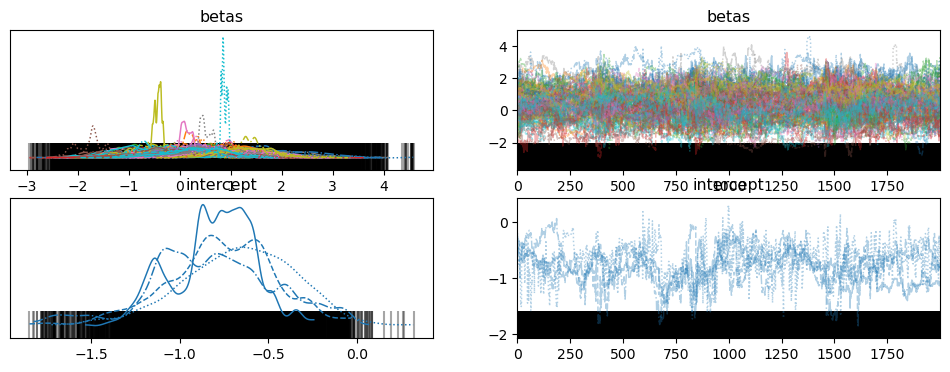

In [26]:
az.plot_trace(trace_bc)

## Q2

In [11]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the Wine Quality dataset (from UCI Repository)
url_wine = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df_wine = pd.read_csv(url_wine, sep=";")

# Select predictor variables and response variables
X_wine = df_wine.iloc[:, :-1].values  # Features (acidity, sugar, etc.)
y_wine = df_wine[["quality", "alcohol"]].values  # Continuous outcomes

# Standardize features
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

# Downsample dataset (smaller subset for Bayesian estimation)
n_small = 200  # Reasonable small dataset
indices_wine = np.random.choice(df_wine.shape[0], n_small, replace=False)
X_train_wine, y_train_wine = X_wine_scaled[indices_wine], y_wine[indices_wine]

# Number of features and output dimensions
p_wine = X_train_wine.shape[1]
m_wine = y_train_wine.shape[1]

# Bayesian Multivariate Regression Model
with pm.Model() as multivariate_model:
    betas = pm.Normal("betas", mu=0, sigma=1, shape=(p_wine, m_wine))
    intercept = pm.Normal("intercept", mu=0, sigma=1, shape=(m_wine,))

    # Covariance matrix for response variables
    L_raw = pm.LKJCholeskyCov("L_raw", n=m_wine, eta=2.0, sd_dist=pm.HalfNormal.dist(1.0), compute_corr=False)
    L = pm.expand_packed_triangular(m_wine, L_raw)
    sigma = pm.Deterministic("Sigma", pm.math.dot(L, L.T))

    # Multivariate normal likelihood
    y_obs = pm.MvNormal("y_obs", mu=pm.math.dot(X_train_wine, betas) + intercept, chol=L, observed=y_train_wine)

    # Perform MCMC sampling
    trace_wine = pm.sample(1000, return_inferencedata=True, target_accept=0.9)

# Summary of posterior distribution
az.summary(trace_wine)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, intercept, L_raw]


/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8846 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
L_raw[0],0.661,0.006,0.651,0.667,0.003,0.002,4.0,13.0,3.32
L_raw[1],-0.000,0.000,-0.000,0.000,0.000,0.000,4114.0,3438.0,1.00
L_raw[2],0.000,0.000,0.000,0.000,0.000,0.000,4.0,12.0,3.43
"Sigma[0, 0]",0.437,0.008,0.424,0.445,0.004,0.002,4.0,13.0,3.32
"Sigma[0, 1]",-0.000,0.000,-0.000,0.000,0.000,0.000,4118.0,3367.0,1.00
"Sigma[1, 0]",-0.000,0.000,-0.000,0.000,0.000,0.000,4118.0,3367.0,1.00
"Sigma[1, 1]",0.000,0.000,0.000,0.000,0.000,0.000,11.0,36.0,1.26
"betas[0, 0]",0.001,0.208,-0.146,0.360,0.104,0.059,4.0,18.0,3.26
"betas[0, 1]",-0.000,0.000,-0.000,0.000,0.000,0.000,3863.0,2677.0,1.00
"betas[1, 0]",-0.097,0.065,-0.167,0.003,0.033,0.014,4.0,12.0,3.42


In [ ]:
az.plot_trace(trace_wine)

## Q3

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import pymc as pm
from scipy import stats

# 1.1 Read TMDB 5000 Movies dataset
df = pd.read_csv("tmdb_5000_movies.csv")

# 1.2 Extract binary labels from 'genres' JSON-like column
top_genres = ["Action", "Drama", "Comedy"]
for g in top_genres:
    df[f"genre_{g}"] = df["genres"].apply(lambda x: int(g in x))

# 1.3 Build the Y matrix (n, m)
Y = df[[f"genre_{g}" for g in top_genres]].values  # shape = (n, 5)

# 1.4 Build the numeric design matrix X (n, p)
# We pick 'budget', 'popularity', 'runtime' as an example
X = df[["budget","popularity","runtime"]].values  # shape = (n, 3)

# 1.5 Drop missing or invalid entries
valid_idx = ~np.isnan(X).any(axis=1)
Y = Y[valid_idx]
X = X[valid_idx]

# Check shapes
n, p = X.shape
m = Y.shape[1]
print(f"Full dataset shape: X is {n} x {p}, Y is {n} x {m}")

# 1.6 Downsample to smaller subset for a quicker demonstration
n_subset = 500
indices = np.random.choice(range(len(X)), size=n_subset, replace=False)

X_small = X[indices]
Y_small = Y[indices]
print(f"Downsampled subset: X_small is {X_small.shape}, Y_small is {Y_small.shape}")

Full dataset shape: X is 4801 x 3, Y is 4801 x 3
Downsampled subset: X_small is (500, 3), Y_small is (500, 3)


In [19]:
# 2.1 Build the PyMC model
p = 3
m = 3
print(p, m)
with pm.Model() as model_correlated:
    
    L, R_corr, std = pm.LKJCholeskyCov(
        "R", 
        n=m, 
        eta=2.0, 
        sd_dist=pm.Exponential.dist(1.0, shape=m),
        compute_corr=True)
    
    betas = pm.Normal("betas", 
                      mu=0, 
                      sigma=1, 
                      shape=(p, m))
    
    z = pm.MvNormal("z", 
                    mu=pm.math.dot(X_small, betas), 
                    cov=R_corr,
                    shape= (n_subset, m))
    
    p = pm.math.invprobit(z)
    y_obs = pm.Bernoulli("y_obs", 
                         p=p, 
                         observed=Y_small)
    
    idata_correlated = pm.sample(
    init="adapt_diag",
        tune=200,
        chains=2)


3 3


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [R, betas, z]


Sampling 2 chains for 200 tune and 1_000 draw iterations (400 + 2_000 draws total) took 4126 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


/opt/conda/lib/python3.11/site-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/opt/conda/lib/python3.11/site-packages/arviz/stats/density_utils.py:700: RuntimeWarning: divide by zero encountered in divide
  f = grid_counts / bin_width / len(x)
/opt/conda/lib/python3.11/site-packages/arviz/stats/density_utils.py:700: RuntimeWarning: invalid value encountered in divide
  f = grid_counts / bin_width / len(x)
/opt/conda/lib/python3.11/site-packages/arviz/stats/density_utils.py:703: RuntimeWarning: divide by zero encountered in scalar divide
  bw /= bin_width


OverflowError: cannot convert float infinity to integer

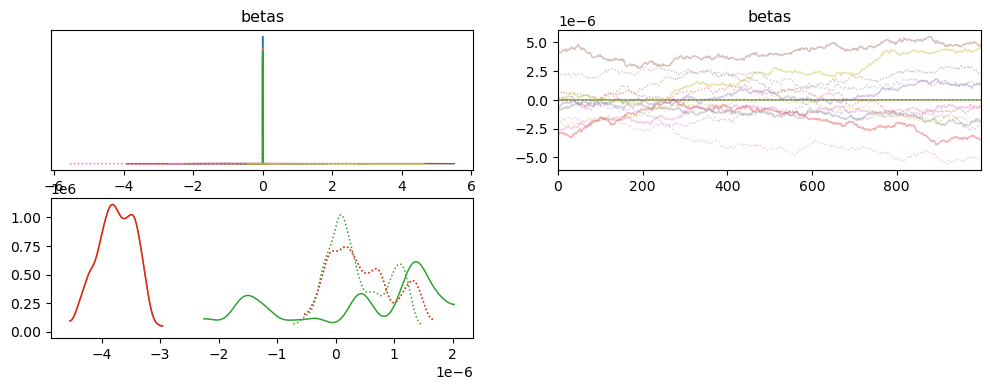

In [23]:
az.plot_trace(idata_correlated, var_names=["betas","R_corr"], compact=True)
plt.show()